## Example usage to plot methane and water lines around 3270 nm

### Workflow 

     1. initiate a 'Spectra' object
     2. add observer
     3. add gass_cells & gasses
     4. download data (runs the hapi functions)
     5. plot
    
    comment: the arguments of the gas_cell method are the default values as on spectracalc.com
             ! when using multiple gas cells, the spectra are calculated seperately and plotted on top of each other. (Not combined absorption as in spectracalc)

In [7]:
%%capture
%load_ext autoreload
%autoreload 2
from classes import Spectra, Observer, HiddenPrints

Using data

CH4
                     Lines parsed: 33
H2O
                     Lines parsed: 9
NH3
                     Lines parsed: 27


In [8]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'Methane_Line_3270_nm')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm]
                                lower =  3270.0,    
                                upper =  3271.0,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 10,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                    VMR       = 200E-6)                                  
# cell 1
my_spectrum.add_gas_cell()
my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",
                                  VMR       = 100E-6)


#%% 4. download (running hapi functions)
with HiddenPrints():            # disables hapi stdout
    my_spectrum.download(line_list=True,         # by setting to false, the linelist will nor be downloaded nor plotted.
                         min_intensity = 5E-23)  # default is 5E-23. This is 

To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

Summary of the spectum Methane_Line_3270_nm: 
	 lower: 3270.0 [nm] 
	 upper: 3271.0 [nm] 
Gas cell 0: 
	 length: 10 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9998, 'self': 0.0002} 
	 Gasses (VMR): 
	 	 CH4: 0.0002 
Gas cell 1: 
	 length: 10 cm | temp: 296 K|pressure: 1 atm|gas matrix: {'air': 0.9999, 'self': 0.0001} 
	 Gasses (VMR): 
	 	 CH4: 0.0001 



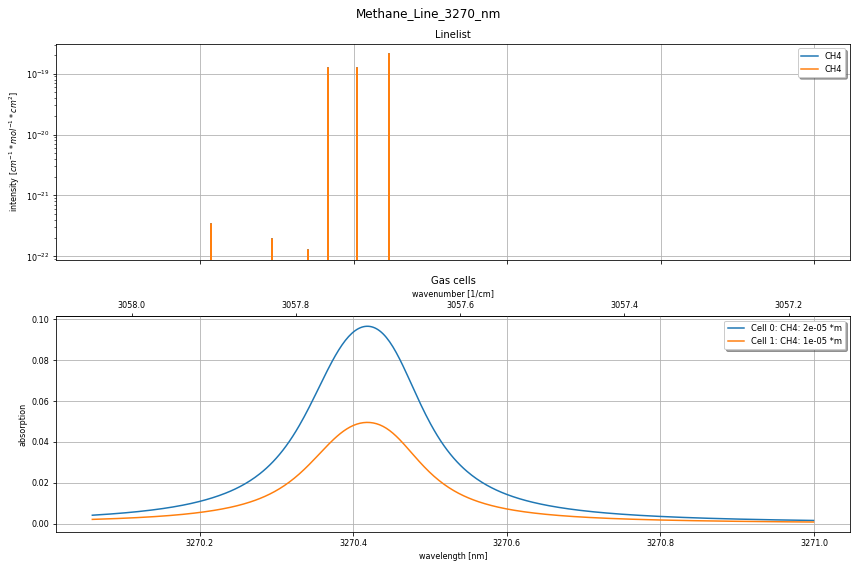

In [9]:
#%% 5. plot
my_spectrum.plot(figsize = (12,8),
                 export = True)
print(my_spectrum)

In [47]:
#%% 6. export
my_spectrum.export(directory = 'exports') # default directory is 'exports'